In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [36]:
df = pd.read_csv('dataset_phishing.csv')
df.head(100)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,https://www.facebook.com/thekeyboardcat,39,16,0,2,0,0,0,0,0,...,0,0,0,2808,8516,8,0,0,10,legitimate
96,https://www.soul-flower.com/,28,19,0,2,1,0,0,0,0,...,1,1,0,347,7689,381695,0,0,3,legitimate
97,http://www.tech-faq.com/mms.html,32,16,0,3,1,0,0,0,0,...,1,0,0,295,5913,86462,0,0,5,legitimate
98,http://sniz.porn,16,9,0,1,0,0,0,0,0,...,0,0,1,0,-1,2346124,0,0,2,legitimate


In [4]:
#label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['labels'] = le.fit_transform(df['status'])

In [5]:
df[['status','labels']].head(10)

,status,labels
0,legitimate,0
1,phishing,1
2,phishing,1
3,legitimate,0
4,legitimate,0
5,phishing,1
6,legitimate,0
7,phishing,1
8,legitimate,0
9,legitimate,0


In [6]:
Y1 = df['labels']
X1 = df.drop(columns = ['url','labels','status'])

In [7]:
X1.head(2)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2


In [8]:
Y1.head(2)

0    0
1    1
Name: labels, dtype: int32

In [9]:
#data for learning without features 

X2 = df['url']
X2.head(2)

0                http://www.crestonwood.com/router.php
1    http://shadetreetechnology.com/V4/validation/a...
Name: url, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [11]:
X_train1 = np.expand_dims(X_train1, axis=-1)
X_test1 = np.expand_dims(X_test1, axis=-1)

X_train1.shape

(9144, 87, 1)

In [12]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
ps = PorterStemmer()
corpus_train = []

def albumentations(X,corpus_t):
    for i in range(len(X)):
        print(i,"/",len(X))
        review = re.sub("[^a-zA-Z]"," ",X[i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))] #TO REMOVE STOP WORDS LIKE THE, A ETC 
        review = " ".join(review)
        corpus_t.append(review)
albumentations(X2,corpus_train)

0 / 11430
1 / 11430
2 / 11430
3 / 11430
4 / 11430
5 / 11430
6 / 11430
7 / 11430
8 / 11430
9 / 11430
10 / 11430
11 / 11430
12 / 11430
13 / 11430
14 / 11430
15 / 11430
16 / 11430
17 / 11430
18 / 11430
19 / 11430
20 / 11430
21 / 11430
22 / 11430
23 / 11430
24 / 11430
25 / 11430
26 / 11430
27 / 11430
28 / 11430
29 / 11430
30 / 11430
31 / 11430
32 / 11430
33 / 11430
34 / 11430
35 / 11430
36 / 11430
37 / 11430
38 / 11430
39 / 11430
40 / 11430
41 / 11430
42 / 11430
43 / 11430
44 / 11430
45 / 11430
46 / 11430
47 / 11430
48 / 11430
49 / 11430
50 / 11430
51 / 11430
52 / 11430
53 / 11430
54 / 11430
55 / 11430
56 / 11430
57 / 11430
58 / 11430
59 / 11430
60 / 11430
61 / 11430
62 / 11430
63 / 11430
64 / 11430
65 / 11430
66 / 11430
67 / 11430
68 / 11430
69 / 11430
70 / 11430
71 / 11430
72 / 11430
73 / 11430
74 / 11430
75 / 11430
76 / 11430
77 / 11430
78 / 11430
79 / 11430
80 / 11430
81 / 11430
82 / 11430
83 / 11430
84 / 11430
85 / 11430
86 / 11430
87 / 11430
88 / 11430
89 / 11430
90 / 11430
91 / 1143

723 / 11430
724 / 11430
725 / 11430
726 / 11430
727 / 11430
728 / 11430
729 / 11430
730 / 11430
731 / 11430
732 / 11430
733 / 11430
734 / 11430
735 / 11430
736 / 11430
737 / 11430
738 / 11430
739 / 11430
740 / 11430
741 / 11430
742 / 11430
743 / 11430
744 / 11430
745 / 11430
746 / 11430
747 / 11430
748 / 11430
749 / 11430
750 / 11430
751 / 11430
752 / 11430
753 / 11430
754 / 11430
755 / 11430
756 / 11430
757 / 11430
758 / 11430
759 / 11430
760 / 11430
761 / 11430
762 / 11430
763 / 11430
764 / 11430
765 / 11430
766 / 11430
767 / 11430
768 / 11430
769 / 11430
770 / 11430
771 / 11430
772 / 11430
773 / 11430
774 / 11430
775 / 11430
776 / 11430
777 / 11430
778 / 11430
779 / 11430
780 / 11430
781 / 11430
782 / 11430
783 / 11430
784 / 11430
785 / 11430
786 / 11430
787 / 11430
788 / 11430
789 / 11430
790 / 11430
791 / 11430
792 / 11430
793 / 11430
794 / 11430
795 / 11430
796 / 11430
797 / 11430
798 / 11430
799 / 11430
800 / 11430
801 / 11430
802 / 11430
803 / 11430
804 / 11430
805 / 11430
806 

1418 / 11430
1419 / 11430
1420 / 11430
1421 / 11430
1422 / 11430
1423 / 11430
1424 / 11430
1425 / 11430
1426 / 11430
1427 / 11430
1428 / 11430
1429 / 11430
1430 / 11430
1431 / 11430
1432 / 11430
1433 / 11430
1434 / 11430
1435 / 11430
1436 / 11430
1437 / 11430
1438 / 11430
1439 / 11430
1440 / 11430
1441 / 11430
1442 / 11430
1443 / 11430
1444 / 11430
1445 / 11430
1446 / 11430
1447 / 11430
1448 / 11430
1449 / 11430
1450 / 11430
1451 / 11430
1452 / 11430
1453 / 11430
1454 / 11430
1455 / 11430
1456 / 11430
1457 / 11430
1458 / 11430
1459 / 11430
1460 / 11430
1461 / 11430
1462 / 11430
1463 / 11430
1464 / 11430
1465 / 11430
1466 / 11430
1467 / 11430
1468 / 11430
1469 / 11430
1470 / 11430
1471 / 11430
1472 / 11430
1473 / 11430
1474 / 11430
1475 / 11430
1476 / 11430
1477 / 11430
1478 / 11430
1479 / 11430
1480 / 11430
1481 / 11430
1482 / 11430
1483 / 11430
1484 / 11430
1485 / 11430
1486 / 11430
1487 / 11430
1488 / 11430
1489 / 11430
1490 / 11430
1491 / 11430
1492 / 11430
1493 / 11430
1494 / 11430

2062 / 11430
2063 / 11430
2064 / 11430
2065 / 11430
2066 / 11430
2067 / 11430
2068 / 11430
2069 / 11430
2070 / 11430
2071 / 11430
2072 / 11430
2073 / 11430
2074 / 11430
2075 / 11430
2076 / 11430
2077 / 11430
2078 / 11430
2079 / 11430
2080 / 11430
2081 / 11430
2082 / 11430
2083 / 11430
2084 / 11430
2085 / 11430
2086 / 11430
2087 / 11430
2088 / 11430
2089 / 11430
2090 / 11430
2091 / 11430
2092 / 11430
2093 / 11430
2094 / 11430
2095 / 11430
2096 / 11430
2097 / 11430
2098 / 11430
2099 / 11430
2100 / 11430
2101 / 11430
2102 / 11430
2103 / 11430
2104 / 11430
2105 / 11430
2106 / 11430
2107 / 11430
2108 / 11430
2109 / 11430
2110 / 11430
2111 / 11430
2112 / 11430
2113 / 11430
2114 / 11430
2115 / 11430
2116 / 11430
2117 / 11430
2118 / 11430
2119 / 11430
2120 / 11430
2121 / 11430
2122 / 11430
2123 / 11430
2124 / 11430
2125 / 11430
2126 / 11430
2127 / 11430
2128 / 11430
2129 / 11430
2130 / 11430
2131 / 11430
2132 / 11430
2133 / 11430
2134 / 11430
2135 / 11430
2136 / 11430
2137 / 11430
2138 / 11430

2699 / 11430
2700 / 11430
2701 / 11430
2702 / 11430
2703 / 11430
2704 / 11430
2705 / 11430
2706 / 11430
2707 / 11430
2708 / 11430
2709 / 11430
2710 / 11430
2711 / 11430
2712 / 11430
2713 / 11430
2714 / 11430
2715 / 11430
2716 / 11430
2717 / 11430
2718 / 11430
2719 / 11430
2720 / 11430
2721 / 11430
2722 / 11430
2723 / 11430
2724 / 11430
2725 / 11430
2726 / 11430
2727 / 11430
2728 / 11430
2729 / 11430
2730 / 11430
2731 / 11430
2732 / 11430
2733 / 11430
2734 / 11430
2735 / 11430
2736 / 11430
2737 / 11430
2738 / 11430
2739 / 11430
2740 / 11430
2741 / 11430
2742 / 11430
2743 / 11430
2744 / 11430
2745 / 11430
2746 / 11430
2747 / 11430
2748 / 11430
2749 / 11430
2750 / 11430
2751 / 11430
2752 / 11430
2753 / 11430
2754 / 11430
2755 / 11430
2756 / 11430
2757 / 11430
2758 / 11430
2759 / 11430
2760 / 11430
2761 / 11430
2762 / 11430
2763 / 11430
2764 / 11430
2765 / 11430
2766 / 11430
2767 / 11430
2768 / 11430
2769 / 11430
2770 / 11430
2771 / 11430
2772 / 11430
2773 / 11430
2774 / 11430
2775 / 11430

3381 / 11430
3382 / 11430
3383 / 11430
3384 / 11430
3385 / 11430
3386 / 11430
3387 / 11430
3388 / 11430
3389 / 11430
3390 / 11430
3391 / 11430
3392 / 11430
3393 / 11430
3394 / 11430
3395 / 11430
3396 / 11430
3397 / 11430
3398 / 11430
3399 / 11430
3400 / 11430
3401 / 11430
3402 / 11430
3403 / 11430
3404 / 11430
3405 / 11430
3406 / 11430
3407 / 11430
3408 / 11430
3409 / 11430
3410 / 11430
3411 / 11430
3412 / 11430
3413 / 11430
3414 / 11430
3415 / 11430
3416 / 11430
3417 / 11430
3418 / 11430
3419 / 11430
3420 / 11430
3421 / 11430
3422 / 11430
3423 / 11430
3424 / 11430
3425 / 11430
3426 / 11430
3427 / 11430
3428 / 11430
3429 / 11430
3430 / 11430
3431 / 11430
3432 / 11430
3433 / 11430
3434 / 11430
3435 / 11430
3436 / 11430
3437 / 11430
3438 / 11430
3439 / 11430
3440 / 11430
3441 / 11430
3442 / 11430
3443 / 11430
3444 / 11430
3445 / 11430
3446 / 11430
3447 / 11430
3448 / 11430
3449 / 11430
3450 / 11430
3451 / 11430
3452 / 11430
3453 / 11430
3454 / 11430
3455 / 11430
3456 / 11430
3457 / 11430

4038 / 11430
4039 / 11430
4040 / 11430
4041 / 11430
4042 / 11430
4043 / 11430
4044 / 11430
4045 / 11430
4046 / 11430
4047 / 11430
4048 / 11430
4049 / 11430
4050 / 11430
4051 / 11430
4052 / 11430
4053 / 11430
4054 / 11430
4055 / 11430
4056 / 11430
4057 / 11430
4058 / 11430
4059 / 11430
4060 / 11430
4061 / 11430
4062 / 11430
4063 / 11430
4064 / 11430
4065 / 11430
4066 / 11430
4067 / 11430
4068 / 11430
4069 / 11430
4070 / 11430
4071 / 11430
4072 / 11430
4073 / 11430
4074 / 11430
4075 / 11430
4076 / 11430
4077 / 11430
4078 / 11430
4079 / 11430
4080 / 11430
4081 / 11430
4082 / 11430
4083 / 11430
4084 / 11430
4085 / 11430
4086 / 11430
4087 / 11430
4088 / 11430
4089 / 11430
4090 / 11430
4091 / 11430
4092 / 11430
4093 / 11430
4094 / 11430
4095 / 11430
4096 / 11430
4097 / 11430
4098 / 11430
4099 / 11430
4100 / 11430
4101 / 11430
4102 / 11430
4103 / 11430
4104 / 11430
4105 / 11430
4106 / 11430
4107 / 11430
4108 / 11430
4109 / 11430
4110 / 11430
4111 / 11430
4112 / 11430
4113 / 11430
4114 / 11430

4707 / 11430
4708 / 11430
4709 / 11430
4710 / 11430
4711 / 11430
4712 / 11430
4713 / 11430
4714 / 11430
4715 / 11430
4716 / 11430
4717 / 11430
4718 / 11430
4719 / 11430
4720 / 11430
4721 / 11430
4722 / 11430
4723 / 11430
4724 / 11430
4725 / 11430
4726 / 11430
4727 / 11430
4728 / 11430
4729 / 11430
4730 / 11430
4731 / 11430
4732 / 11430
4733 / 11430
4734 / 11430
4735 / 11430
4736 / 11430
4737 / 11430
4738 / 11430
4739 / 11430
4740 / 11430
4741 / 11430
4742 / 11430
4743 / 11430
4744 / 11430
4745 / 11430
4746 / 11430
4747 / 11430
4748 / 11430
4749 / 11430
4750 / 11430
4751 / 11430
4752 / 11430
4753 / 11430
4754 / 11430
4755 / 11430
4756 / 11430
4757 / 11430
4758 / 11430
4759 / 11430
4760 / 11430
4761 / 11430
4762 / 11430
4763 / 11430
4764 / 11430
4765 / 11430
4766 / 11430
4767 / 11430
4768 / 11430
4769 / 11430
4770 / 11430
4771 / 11430
4772 / 11430
4773 / 11430
4774 / 11430
4775 / 11430
4776 / 11430
4777 / 11430
4778 / 11430
4779 / 11430
4780 / 11430
4781 / 11430
4782 / 11430
4783 / 11430

5367 / 11430
5368 / 11430
5369 / 11430
5370 / 11430
5371 / 11430
5372 / 11430
5373 / 11430
5374 / 11430
5375 / 11430
5376 / 11430
5377 / 11430
5378 / 11430
5379 / 11430
5380 / 11430
5381 / 11430
5382 / 11430
5383 / 11430
5384 / 11430
5385 / 11430
5386 / 11430
5387 / 11430
5388 / 11430
5389 / 11430
5390 / 11430
5391 / 11430
5392 / 11430
5393 / 11430
5394 / 11430
5395 / 11430
5396 / 11430
5397 / 11430
5398 / 11430
5399 / 11430
5400 / 11430
5401 / 11430
5402 / 11430
5403 / 11430
5404 / 11430
5405 / 11430
5406 / 11430
5407 / 11430
5408 / 11430
5409 / 11430
5410 / 11430
5411 / 11430
5412 / 11430
5413 / 11430
5414 / 11430
5415 / 11430
5416 / 11430
5417 / 11430
5418 / 11430
5419 / 11430
5420 / 11430
5421 / 11430
5422 / 11430
5423 / 11430
5424 / 11430
5425 / 11430
5426 / 11430
5427 / 11430
5428 / 11430
5429 / 11430
5430 / 11430
5431 / 11430
5432 / 11430
5433 / 11430
5434 / 11430
5435 / 11430
5436 / 11430
5437 / 11430
5438 / 11430
5439 / 11430
5440 / 11430
5441 / 11430
5442 / 11430
5443 / 11430

6023 / 11430
6024 / 11430
6025 / 11430
6026 / 11430
6027 / 11430
6028 / 11430
6029 / 11430
6030 / 11430
6031 / 11430
6032 / 11430
6033 / 11430
6034 / 11430
6035 / 11430
6036 / 11430
6037 / 11430
6038 / 11430
6039 / 11430
6040 / 11430
6041 / 11430
6042 / 11430
6043 / 11430
6044 / 11430
6045 / 11430
6046 / 11430
6047 / 11430
6048 / 11430
6049 / 11430
6050 / 11430
6051 / 11430
6052 / 11430
6053 / 11430
6054 / 11430
6055 / 11430
6056 / 11430
6057 / 11430
6058 / 11430
6059 / 11430
6060 / 11430
6061 / 11430
6062 / 11430
6063 / 11430
6064 / 11430
6065 / 11430
6066 / 11430
6067 / 11430
6068 / 11430
6069 / 11430
6070 / 11430
6071 / 11430
6072 / 11430
6073 / 11430
6074 / 11430
6075 / 11430
6076 / 11430
6077 / 11430
6078 / 11430
6079 / 11430
6080 / 11430
6081 / 11430
6082 / 11430
6083 / 11430
6084 / 11430
6085 / 11430
6086 / 11430
6087 / 11430
6088 / 11430
6089 / 11430
6090 / 11430
6091 / 11430
6092 / 11430
6093 / 11430
6094 / 11430
6095 / 11430
6096 / 11430
6097 / 11430
6098 / 11430
6099 / 11430

6708 / 11430
6709 / 11430
6710 / 11430
6711 / 11430
6712 / 11430
6713 / 11430
6714 / 11430
6715 / 11430
6716 / 11430
6717 / 11430
6718 / 11430
6719 / 11430
6720 / 11430
6721 / 11430
6722 / 11430
6723 / 11430
6724 / 11430
6725 / 11430
6726 / 11430
6727 / 11430
6728 / 11430
6729 / 11430
6730 / 11430
6731 / 11430
6732 / 11430
6733 / 11430
6734 / 11430
6735 / 11430
6736 / 11430
6737 / 11430
6738 / 11430
6739 / 11430
6740 / 11430
6741 / 11430
6742 / 11430
6743 / 11430
6744 / 11430
6745 / 11430
6746 / 11430
6747 / 11430
6748 / 11430
6749 / 11430
6750 / 11430
6751 / 11430
6752 / 11430
6753 / 11430
6754 / 11430
6755 / 11430
6756 / 11430
6757 / 11430
6758 / 11430
6759 / 11430
6760 / 11430
6761 / 11430
6762 / 11430
6763 / 11430
6764 / 11430
6765 / 11430
6766 / 11430
6767 / 11430
6768 / 11430
6769 / 11430
6770 / 11430
6771 / 11430
6772 / 11430
6773 / 11430
6774 / 11430
6775 / 11430
6776 / 11430
6777 / 11430
6778 / 11430
6779 / 11430
6780 / 11430
6781 / 11430
6782 / 11430
6783 / 11430
6784 / 11430

7347 / 11430
7348 / 11430
7349 / 11430
7350 / 11430
7351 / 11430
7352 / 11430
7353 / 11430
7354 / 11430
7355 / 11430
7356 / 11430
7357 / 11430
7358 / 11430
7359 / 11430
7360 / 11430
7361 / 11430
7362 / 11430
7363 / 11430
7364 / 11430
7365 / 11430
7366 / 11430
7367 / 11430
7368 / 11430
7369 / 11430
7370 / 11430
7371 / 11430
7372 / 11430
7373 / 11430
7374 / 11430
7375 / 11430
7376 / 11430
7377 / 11430
7378 / 11430
7379 / 11430
7380 / 11430
7381 / 11430
7382 / 11430
7383 / 11430
7384 / 11430
7385 / 11430
7386 / 11430
7387 / 11430
7388 / 11430
7389 / 11430
7390 / 11430
7391 / 11430
7392 / 11430
7393 / 11430
7394 / 11430
7395 / 11430
7396 / 11430
7397 / 11430
7398 / 11430
7399 / 11430
7400 / 11430
7401 / 11430
7402 / 11430
7403 / 11430
7404 / 11430
7405 / 11430
7406 / 11430
7407 / 11430
7408 / 11430
7409 / 11430
7410 / 11430
7411 / 11430
7412 / 11430
7413 / 11430
7414 / 11430
7415 / 11430
7416 / 11430
7417 / 11430
7418 / 11430
7419 / 11430
7420 / 11430
7421 / 11430
7422 / 11430
7423 / 11430

8014 / 11430
8015 / 11430
8016 / 11430
8017 / 11430
8018 / 11430
8019 / 11430
8020 / 11430
8021 / 11430
8022 / 11430
8023 / 11430
8024 / 11430
8025 / 11430
8026 / 11430
8027 / 11430
8028 / 11430
8029 / 11430
8030 / 11430
8031 / 11430
8032 / 11430
8033 / 11430
8034 / 11430
8035 / 11430
8036 / 11430
8037 / 11430
8038 / 11430
8039 / 11430
8040 / 11430
8041 / 11430
8042 / 11430
8043 / 11430
8044 / 11430
8045 / 11430
8046 / 11430
8047 / 11430
8048 / 11430
8049 / 11430
8050 / 11430
8051 / 11430
8052 / 11430
8053 / 11430
8054 / 11430
8055 / 11430
8056 / 11430
8057 / 11430
8058 / 11430
8059 / 11430
8060 / 11430
8061 / 11430
8062 / 11430
8063 / 11430
8064 / 11430
8065 / 11430
8066 / 11430
8067 / 11430
8068 / 11430
8069 / 11430
8070 / 11430
8071 / 11430
8072 / 11430
8073 / 11430
8074 / 11430
8075 / 11430
8076 / 11430
8077 / 11430
8078 / 11430
8079 / 11430
8080 / 11430
8081 / 11430
8082 / 11430
8083 / 11430
8084 / 11430
8085 / 11430
8086 / 11430
8087 / 11430
8088 / 11430
8089 / 11430
8090 / 11430

8662 / 11430
8663 / 11430
8664 / 11430
8665 / 11430
8666 / 11430
8667 / 11430
8668 / 11430
8669 / 11430
8670 / 11430
8671 / 11430
8672 / 11430
8673 / 11430
8674 / 11430
8675 / 11430
8676 / 11430
8677 / 11430
8678 / 11430
8679 / 11430
8680 / 11430
8681 / 11430
8682 / 11430
8683 / 11430
8684 / 11430
8685 / 11430
8686 / 11430
8687 / 11430
8688 / 11430
8689 / 11430
8690 / 11430
8691 / 11430
8692 / 11430
8693 / 11430
8694 / 11430
8695 / 11430
8696 / 11430
8697 / 11430
8698 / 11430
8699 / 11430
8700 / 11430
8701 / 11430
8702 / 11430
8703 / 11430
8704 / 11430
8705 / 11430
8706 / 11430
8707 / 11430
8708 / 11430
8709 / 11430
8710 / 11430
8711 / 11430
8712 / 11430
8713 / 11430
8714 / 11430
8715 / 11430
8716 / 11430
8717 / 11430
8718 / 11430
8719 / 11430
8720 / 11430
8721 / 11430
8722 / 11430
8723 / 11430
8724 / 11430
8725 / 11430
8726 / 11430
8727 / 11430
8728 / 11430
8729 / 11430
8730 / 11430
8731 / 11430
8732 / 11430
8733 / 11430
8734 / 11430
8735 / 11430
8736 / 11430
8737 / 11430
8738 / 11430

9335 / 11430
9336 / 11430
9337 / 11430
9338 / 11430
9339 / 11430
9340 / 11430
9341 / 11430
9342 / 11430
9343 / 11430
9344 / 11430
9345 / 11430
9346 / 11430
9347 / 11430
9348 / 11430
9349 / 11430
9350 / 11430
9351 / 11430
9352 / 11430
9353 / 11430
9354 / 11430
9355 / 11430
9356 / 11430
9357 / 11430
9358 / 11430
9359 / 11430
9360 / 11430
9361 / 11430
9362 / 11430
9363 / 11430
9364 / 11430
9365 / 11430
9366 / 11430
9367 / 11430
9368 / 11430
9369 / 11430
9370 / 11430
9371 / 11430
9372 / 11430
9373 / 11430
9374 / 11430
9375 / 11430
9376 / 11430
9377 / 11430
9378 / 11430
9379 / 11430
9380 / 11430
9381 / 11430
9382 / 11430
9383 / 11430
9384 / 11430
9385 / 11430
9386 / 11430
9387 / 11430
9388 / 11430
9389 / 11430
9390 / 11430
9391 / 11430
9392 / 11430
9393 / 11430
9394 / 11430
9395 / 11430
9396 / 11430
9397 / 11430
9398 / 11430
9399 / 11430
9400 / 11430
9401 / 11430
9402 / 11430
9403 / 11430
9404 / 11430
9405 / 11430
9406 / 11430
9407 / 11430
9408 / 11430
9409 / 11430
9410 / 11430
9411 / 11430

10014 / 11430
10015 / 11430
10016 / 11430
10017 / 11430
10018 / 11430
10019 / 11430
10020 / 11430
10021 / 11430
10022 / 11430
10023 / 11430
10024 / 11430
10025 / 11430
10026 / 11430
10027 / 11430
10028 / 11430
10029 / 11430
10030 / 11430
10031 / 11430
10032 / 11430
10033 / 11430
10034 / 11430
10035 / 11430
10036 / 11430
10037 / 11430
10038 / 11430
10039 / 11430
10040 / 11430
10041 / 11430
10042 / 11430
10043 / 11430
10044 / 11430
10045 / 11430
10046 / 11430
10047 / 11430
10048 / 11430
10049 / 11430
10050 / 11430
10051 / 11430
10052 / 11430
10053 / 11430
10054 / 11430
10055 / 11430
10056 / 11430
10057 / 11430
10058 / 11430
10059 / 11430
10060 / 11430
10061 / 11430
10062 / 11430
10063 / 11430
10064 / 11430
10065 / 11430
10066 / 11430
10067 / 11430
10068 / 11430
10069 / 11430
10070 / 11430
10071 / 11430
10072 / 11430
10073 / 11430
10074 / 11430
10075 / 11430
10076 / 11430
10077 / 11430
10078 / 11430
10079 / 11430
10080 / 11430
10081 / 11430
10082 / 11430
10083 / 11430
10084 / 11430
10085 

10642 / 11430
10643 / 11430
10644 / 11430
10645 / 11430
10646 / 11430
10647 / 11430
10648 / 11430
10649 / 11430
10650 / 11430
10651 / 11430
10652 / 11430
10653 / 11430
10654 / 11430
10655 / 11430
10656 / 11430
10657 / 11430
10658 / 11430
10659 / 11430
10660 / 11430
10661 / 11430
10662 / 11430
10663 / 11430
10664 / 11430
10665 / 11430
10666 / 11430
10667 / 11430
10668 / 11430
10669 / 11430
10670 / 11430
10671 / 11430
10672 / 11430
10673 / 11430
10674 / 11430
10675 / 11430
10676 / 11430
10677 / 11430
10678 / 11430
10679 / 11430
10680 / 11430
10681 / 11430
10682 / 11430
10683 / 11430
10684 / 11430
10685 / 11430
10686 / 11430
10687 / 11430
10688 / 11430
10689 / 11430
10690 / 11430
10691 / 11430
10692 / 11430
10693 / 11430
10694 / 11430
10695 / 11430
10696 / 11430
10697 / 11430
10698 / 11430
10699 / 11430
10700 / 11430
10701 / 11430
10702 / 11430
10703 / 11430
10704 / 11430
10705 / 11430
10706 / 11430
10707 / 11430
10708 / 11430
10709 / 11430
10710 / 11430
10711 / 11430
10712 / 11430
10713 

11250 / 11430
11251 / 11430
11252 / 11430
11253 / 11430
11254 / 11430
11255 / 11430
11256 / 11430
11257 / 11430
11258 / 11430
11259 / 11430
11260 / 11430
11261 / 11430
11262 / 11430
11263 / 11430
11264 / 11430
11265 / 11430
11266 / 11430
11267 / 11430
11268 / 11430
11269 / 11430
11270 / 11430
11271 / 11430
11272 / 11430
11273 / 11430
11274 / 11430
11275 / 11430
11276 / 11430
11277 / 11430
11278 / 11430
11279 / 11430
11280 / 11430
11281 / 11430
11282 / 11430
11283 / 11430
11284 / 11430
11285 / 11430
11286 / 11430
11287 / 11430
11288 / 11430
11289 / 11430
11290 / 11430
11291 / 11430
11292 / 11430
11293 / 11430
11294 / 11430
11295 / 11430
11296 / 11430
11297 / 11430
11298 / 11430
11299 / 11430
11300 / 11430
11301 / 11430
11302 / 11430
11303 / 11430
11304 / 11430
11305 / 11430
11306 / 11430
11307 / 11430
11308 / 11430
11309 / 11430
11310 / 11430
11311 / 11430
11312 / 11430
11313 / 11430
11314 / 11430
11315 / 11430
11316 / 11430
11317 / 11430
11318 / 11430
11319 / 11430
11320 / 11430
11321 

In [14]:
corpus_train[:4]

['http www crestonwood com router php',
 'http shadetreetechnolog com v valid aedc ae eabcfa e',
 'http support appleld com secureupd duilawyeryork com ap e b b b cmd updat dispatch e b b b b local',
 'http rgipt ac']

In [15]:
cv =TfidfVectorizer(max_features = 1000)
X2 = cv.fit_transform(corpus_train).toarray()

In [16]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [17]:
X_train2 = np.expand_dims(X_train2, axis = -1)
X_test2 = np.expand_dims(X_test2, axis = -1)
print(X_train2.shape,Y_train2.shape)
print(X_test2.shape,Y_test2.shape)

(9144, 1000, 1) (9144,)
(2286, 1000, 1) (2286,)


In [18]:
input_size1 = X_train1[1].shape
input_size2 = X_train2[2].shape
input_size1,input_size2

((87, 1), (1000, 1))

In [19]:
def eval_graph(results):

    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,acc,'r',label="Training Accuracy")
    plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()
    
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,loss,'r',label="Training loss")
    plt.plot(epochs,val_loss,'b',label="Validation loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()

In [20]:
def conf_matrix(X_test,Y_test,model):
    
    Y_pred = model.predict(X_test)
    Y_pred = Y_pred>0.5
    cm = confusion_matrix(Y_test,Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap = plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()

In [21]:
from keras import Sequential

def CNN(input_size):

    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_model1 = CNN(input_size1)
CNN_model2 = CNN(input_size2)
CNN_model1.summary()
CNN_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 87, 16)            64        
                                                                 
 dropout (Dropout)           (None, 87, 16)            0         
                                                                 
 batch_normalization (Batch  (None, 87, 16)            64        
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 44, 16)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 44, 32)            1568      
                                                                 
 dropout_1 (Dropout)         (None, 44, 32)            0

 dense_2 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 4328417 (16.51 MB)
Trainable params: 4327425 (16.51 MB)
Non-trainable params: 992 (3.88 KB)
_________________________________________________________________


In [22]:
CNN_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_1 = CNN_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.8386 - accuracy: 0.5839
Epoch 1: val_loss improved from inf to 0.69782, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 14s 145ms/step - loss: 0.8386 - accuracy: 0.5839 - val_loss: 0.6978 - val_accuracy: 0.5555
Epoch 2/200


C:\Users\viraj\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/58 [============================>.] - ETA: 0s - loss: 0.6811 - accuracy: 0.6512
Epoch 2: val_loss did not improve from 0.69782
58/58 [==============================] - 9s 151ms/step - loss: 0.6810 - accuracy: 0.6513 - val_loss: 0.7437 - val_accuracy: 0.5779
Epoch 3/200
57/58 [============================>.] - ETA: 0s - loss: 0.6305 - accuracy: 0.6683
Epoch 3: val_loss improved from 0.69782 to 0.67699, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 7s 115ms/step - loss: 0.6307 - accuracy: 0.6681 - val_loss: 0.6770 - val_accuracy: 0.5932
Epoch 4/200
57/58 [============================>.] - ETA: 0s - loss: 0.5971 - accuracy: 0.6972
Epoch 4: val_loss did not improve from 0.67699
58/58 [==============================] - 5s 93ms/step - loss: 0.5971 - accuracy: 0.6971 - val_loss: 0.7016 - val_accuracy: 0.6102
Epoch 5/200
57/58 [============================>.] - ETA: 0s - loss: 0.6004 - accuracy: 0.6994
Epoch 5: val_loss did not improve from 0.676

58/58 [==============================] - 6s 96ms/step - loss: 0.5599 - accuracy: 0.7285 - val_loss: 0.5441 - val_accuracy: 0.7354
Epoch 31/200
57/58 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7329
Epoch 31: val_loss did not improve from 0.54411
58/58 [==============================] - 5s 89ms/step - loss: 0.5573 - accuracy: 0.7325 - val_loss: 0.6235 - val_accuracy: 0.6638
Epoch 32/200
57/58 [============================>.] - ETA: 0s - loss: 0.5559 - accuracy: 0.7316
Epoch 32: val_loss did not improve from 0.54411
58/58 [==============================] - 5s 88ms/step - loss: 0.5560 - accuracy: 0.7315 - val_loss: 2.5081 - val_accuracy: 0.5566
Epoch 33/200
57/58 [============================>.] - ETA: 0s - loss: 0.5476 - accuracy: 0.7468
Epoch 33: val_loss did not improve from 0.54411
58/58 [==============================] - 5s 89ms/step - loss: 0.5478 - accuracy: 0.7467 - val_loss: 1.4955 - val_accuracy: 0.5768
Epoch 34/200
57/58 [============================

Epoch 60/200
58/58 [==============================] - ETA: 0s - loss: 0.5443 - accuracy: 0.7418
Epoch 60: val_loss did not improve from 0.52393
58/58 [==============================] - 10s 177ms/step - loss: 0.5443 - accuracy: 0.7418 - val_loss: 0.9520 - val_accuracy: 0.5030
Epoch 61/200
58/58 [==============================] - ETA: 0s - loss: 0.5458 - accuracy: 0.7373
Epoch 61: val_loss did not improve from 0.52393
58/58 [==============================] - 10s 173ms/step - loss: 0.5458 - accuracy: 0.7373 - val_loss: 1.0257 - val_accuracy: 0.5446
Epoch 62/200
58/58 [==============================] - ETA: 0s - loss: 0.5446 - accuracy: 0.7444
Epoch 62: val_loss did not improve from 0.52393
58/58 [==============================] - 10s 169ms/step - loss: 0.5446 - accuracy: 0.7444 - val_loss: 0.6161 - val_accuracy: 0.6730
Epoch 63/200
58/58 [==============================] - ETA: 0s - loss: 0.5540 - accuracy: 0.7367
Epoch 63: val_loss did not improve from 0.52393
58/58 [=====================

58/58 [==============================] - 13s 226ms/step - loss: 0.5354 - accuracy: 0.7471 - val_loss: 2.4303 - val_accuracy: 0.4964
Epoch 90/200
58/58 [==============================] - ETA: 0s - loss: 0.5578 - accuracy: 0.7349
Epoch 90: val_loss did not improve from 0.52212
58/58 [==============================] - 16s 279ms/step - loss: 0.5578 - accuracy: 0.7349 - val_loss: 8.4213 - val_accuracy: 0.5036
Epoch 91/200
57/58 [============================>.] - ETA: 0s - loss: 0.5469 - accuracy: 0.7353
Epoch 91: val_loss did not improve from 0.52212
58/58 [==============================] - 17s 298ms/step - loss: 0.5471 - accuracy: 0.7351 - val_loss: 1.9259 - val_accuracy: 0.5036
Epoch 92/200
58/58 [==============================] - ETA: 0s - loss: 0.4980 - accuracy: 0.7671
Epoch 92: val_loss did not improve from 0.52212
58/58 [==============================] - 10s 180ms/step - loss: 0.4980 - accuracy: 0.7671 - val_loss: 0.7891 - val_accuracy: 0.5358
Epoch 93/200
58/58 [====================

In [23]:
CNN_model1.evaluate(X_test1,Y_test1,verbose = 1)

72/72 [==============================] - 1s 8ms/step - loss: 1.1324 - accuracy: 0.5000


[1.1323564052581787, 0.5]

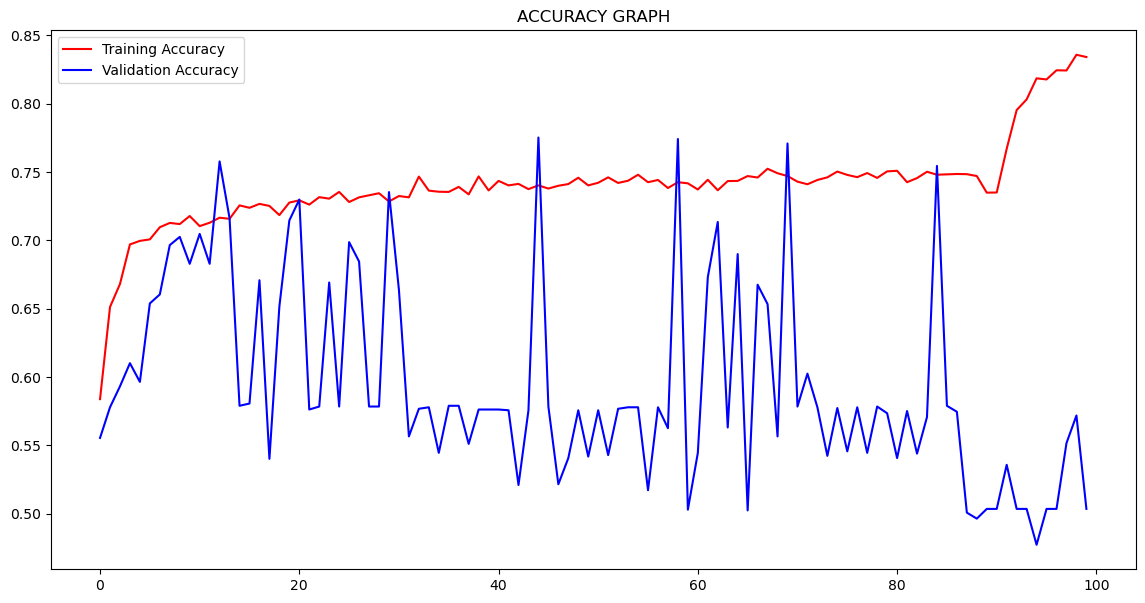

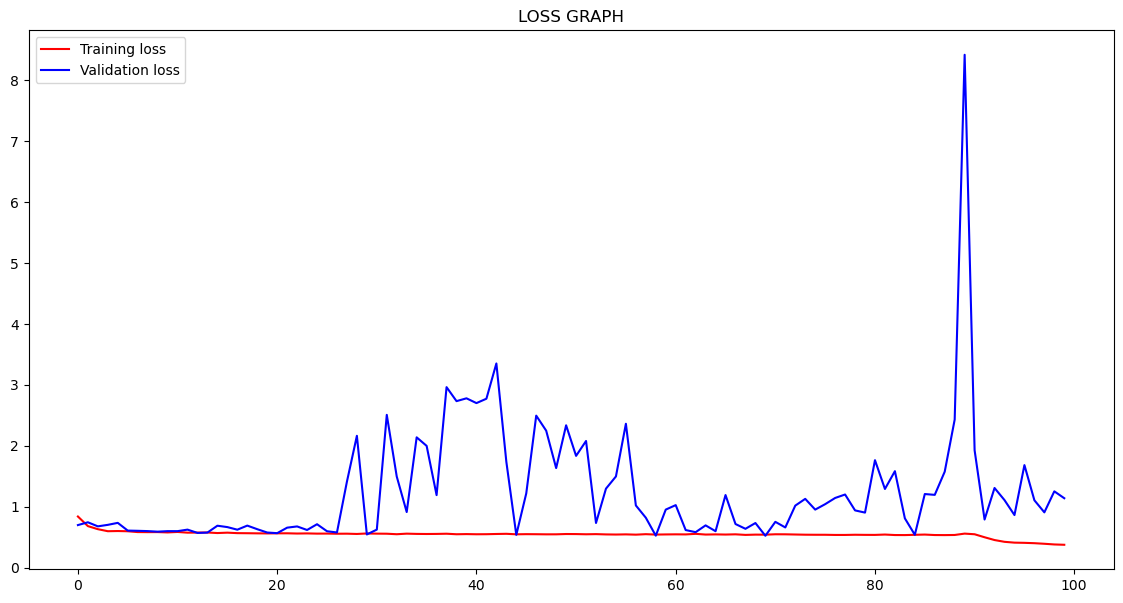

In [24]:
eval_graph(CNN_results_1)

In [25]:
Y_test1

6172    1
9810    1
8537    1
605     1
6549    0
       ..
4104    0
6374    0
6232    0
3950    0
8863    0
Name: labels, Length: 2286, dtype: int32

72/72 [==============================] - 1s 7ms/step


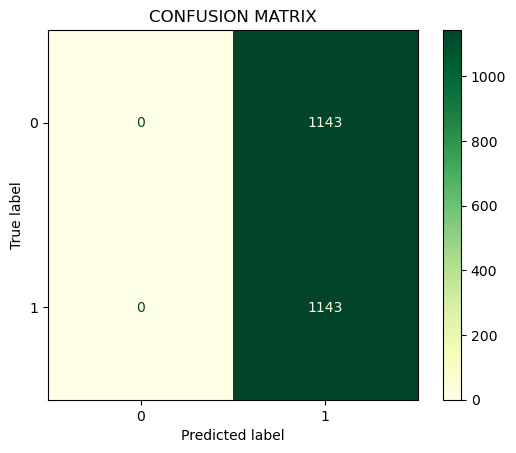

In [26]:
conf_matrix(X_test1,Y_test1,CNN_model1)

In [27]:
CNN_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_2 = CNN_model2.fit(X_train2,Y_train2,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.9381 - accuracy: 0.6931
Epoch 1: val_loss improved from inf to 0.68756, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5


C:\Users\viraj\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


58/58 [==============================] - 83s 1s/step - loss: 0.9381 - accuracy: 0.6931 - val_loss: 0.6876 - val_accuracy: 0.6501
Epoch 2/200
58/58 [==============================] - ETA: 0s - loss: 0.4708 - accuracy: 0.7863
Epoch 2: val_loss did not improve from 0.68756
58/58 [==============================] - 98s 2s/step - loss: 0.4708 - accuracy: 0.7863 - val_loss: 0.6876 - val_accuracy: 0.5888
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 0.4228 - accuracy: 0.8083
Epoch 3: val_loss improved from 0.68756 to 0.67311, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 111s 2s/step - loss: 0.4228 - accuracy: 0.8083 - val_loss: 0.6731 - val_accuracy: 0.6195
Epoch 4/200
58/58 [==============================] - ETA: 0s - loss: 0.3875 - accuracy: 0.8325
Epoch 4: val_loss improved from 0.67311 to 0.64991, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 101s 2s/step - loss: 0.3875

Epoch 29/200
58/58 [==============================] - ETA: 0s - loss: 0.1426 - accuracy: 0.9412
Epoch 29: val_loss did not improve from 0.24253
58/58 [==============================] - 47s 810ms/step - loss: 0.1426 - accuracy: 0.9412 - val_loss: 0.2605 - val_accuracy: 0.9027
Epoch 30/200
58/58 [==============================] - ETA: 0s - loss: 0.1451 - accuracy: 0.9388
Epoch 30: val_loss did not improve from 0.24253
58/58 [==============================] - 47s 809ms/step - loss: 0.1451 - accuracy: 0.9388 - val_loss: 0.2662 - val_accuracy: 0.9032
Epoch 31/200
58/58 [==============================] - ETA: 0s - loss: 0.1428 - accuracy: 0.9441
Epoch 31: val_loss did not improve from 0.24253
58/58 [==============================] - 47s 808ms/step - loss: 0.1428 - accuracy: 0.9441 - val_loss: 0.2681 - val_accuracy: 0.9010
Epoch 32/200
58/58 [==============================] - ETA: 0s - loss: 0.1401 - accuracy: 0.9408
Epoch 32: val_loss did not improve from 0.24253
58/58 [=====================

In [28]:
CNN_model2.evaluate(X_test2,Y_test2,verbose = 1)

72/72 [==============================] - 3s 36ms/step - loss: 0.3132 - accuracy: 0.9108


[0.31320610642433167, 0.9107611775398254]

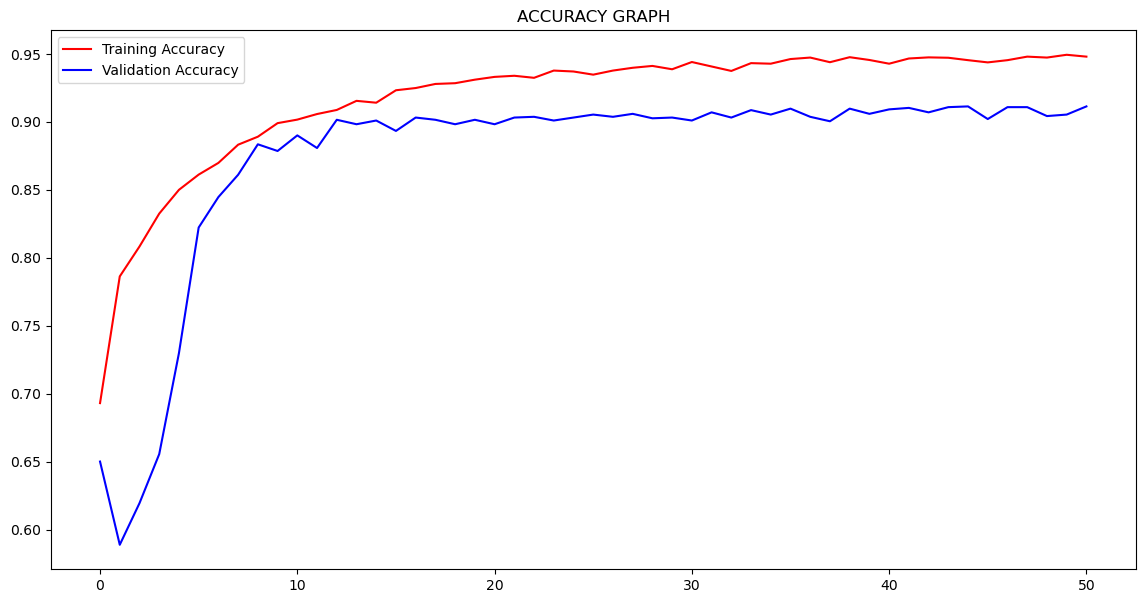

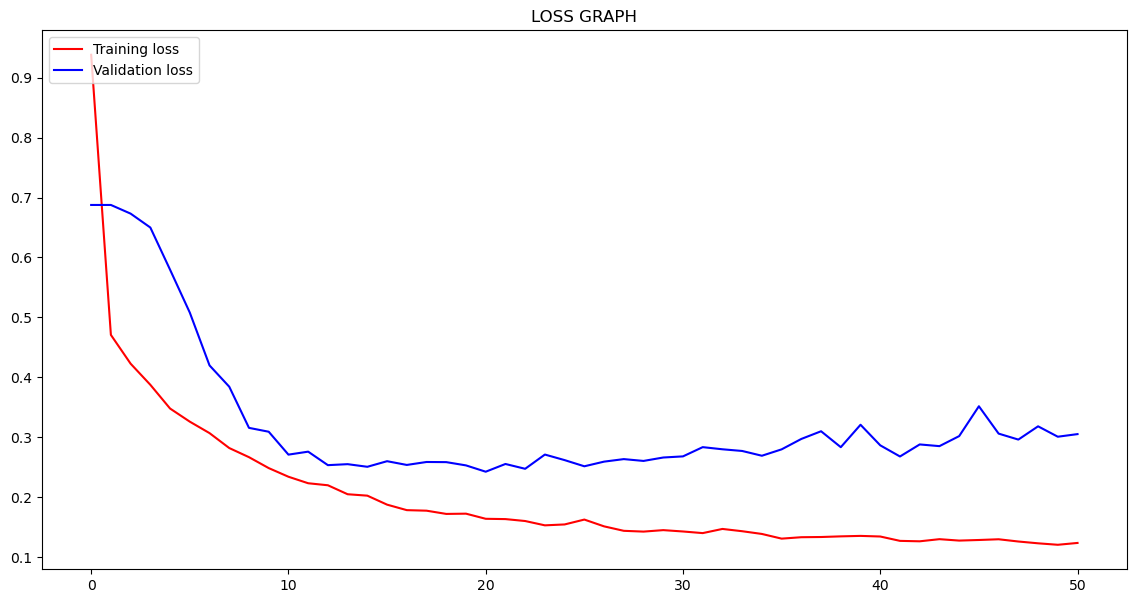

72/72 [==============================] - 4s 49ms/step


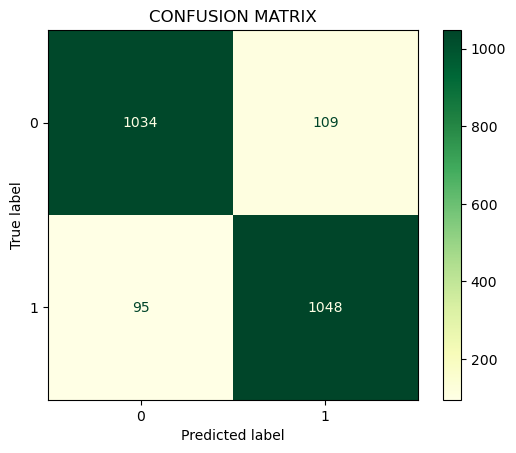

In [29]:
eval_graph(CNN_results_2)
conf_matrix(X_test2,Y_test2,CNN_model2)

In [31]:
def CNN_LSTM(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.LSTM(128,return_sequences=True))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_LSTM_model1 = CNN_LSTM(input_size1)
CNN_LSTM_model1.summary()
CNN_LSTM_model2 = CNN_LSTM(input_size2)    
CNN_LSTM_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 87, 16)            64        
                                                                 
 dropout_14 (Dropout)        (None, 87, 16)            0         
                                                                 
 batch_normalization_10 (Ba  (None, 87, 16)            64        
 tchNormalization)                                               
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 44, 16)            0         
 ng1D)                                                           
                                                                 
 conv1d_11 (Conv1D)          (None, 44, 32)            1568      
                                                                 
 dropout_15 (Dropout)        (None, 44, 32)           

 flatten_3 (Flatten)         (None, 8064)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               1032320   
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1379169 (5.26 MB)
Trainable params: 1378177 (5.26 MB)
Non-trainable params: 992 (3.88 KB)
_________________________________________________________________


In [32]:
#CNN LSTM on FIRST DATASET

CNN_LSTM_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_1 = CNN_LSTM_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
57/58 [============================>.] - ETA: 0s - loss: 0.6662 - accuracy: 0.5806
Epoch 1: val_loss improved from inf to 0.71078, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 17s 132ms/step - loss: 0.6657 - accuracy: 0.5811 - val_loss: 0.7108 - val_accuracy: 0.5293
Epoch 2/200


C:\Users\viraj\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/58 [============================>.] - ETA: 0s - loss: 0.5648 - accuracy: 0.7177
Epoch 2: val_loss improved from 0.71078 to 0.66535, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 7s 114ms/step - loss: 0.5650 - accuracy: 0.7170 - val_loss: 0.6653 - val_accuracy: 0.5970
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 0.4671 - accuracy: 0.7844
Epoch 3: val_loss did not improve from 0.66535
58/58 [==============================] - 9s 154ms/step - loss: 0.4671 - accuracy: 0.7844 - val_loss: 0.8234 - val_accuracy: 0.5347
Epoch 4/200
57/58 [============================>.] - ETA: 0s - loss: 0.4319 - accuracy: 0.8096
Epoch 4: val_loss did not improve from 0.66535
58/58 [==============================] - 12s 207ms/step - loss: 0.4320 - accuracy: 0.8094 - val_loss: 1.0704 - val_accuracy: 0.5008
Epoch 5/200
58/58 [==============================] - ETA: 0s - loss: 0.4093 - accuracy: 0.8215
Epoch 5: val_loss did not improve fro

Epoch 31/200
57/58 [============================>.] - ETA: 0s - loss: 0.3099 - accuracy: 0.8701
Epoch 31: val_loss improved from 0.27784 to 0.25434, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 6s 109ms/step - loss: 0.3098 - accuracy: 0.8699 - val_loss: 0.2543 - val_accuracy: 0.8961
Epoch 32/200
57/58 [============================>.] - ETA: 0s - loss: 0.2938 - accuracy: 0.8784
Epoch 32: val_loss did not improve from 0.25434
58/58 [==============================] - 6s 107ms/step - loss: 0.2943 - accuracy: 0.8782 - val_loss: 0.3736 - val_accuracy: 0.8573
Epoch 33/200
57/58 [============================>.] - ETA: 0s - loss: 0.3032 - accuracy: 0.8731
Epoch 33: val_loss did not improve from 0.25434
58/58 [==============================] - 6s 107ms/step - loss: 0.3038 - accuracy: 0.8729 - val_loss: 0.6743 - val_accuracy: 0.6419
Epoch 34/200
57/58 [============================>.] - ETA: 0s - loss: 0.3109 - accuracy: 0.8734
Epoch 34: val_loss 

58/58 [==============================] - 6s 107ms/step - loss: 0.2464 - accuracy: 0.9069 - val_loss: 0.3055 - val_accuracy: 0.8759
Epoch 61/200
57/58 [============================>.] - ETA: 0s - loss: 0.2535 - accuracy: 0.8976
Epoch 61: val_loss did not improve from 0.24487
58/58 [==============================] - 6s 106ms/step - loss: 0.2531 - accuracy: 0.8979 - val_loss: 0.3304 - val_accuracy: 0.8562
Epoch 62/200
57/58 [============================>.] - ETA: 0s - loss: 0.2420 - accuracy: 0.9017
Epoch 62: val_loss did not improve from 0.24487
58/58 [==============================] - 6s 106ms/step - loss: 0.2422 - accuracy: 0.9017 - val_loss: 0.3201 - val_accuracy: 0.8671
Epoch 63/200
57/58 [============================>.] - ETA: 0s - loss: 0.2486 - accuracy: 0.9035
Epoch 63: val_loss did not improve from 0.24487
58/58 [==============================] - 6s 107ms/step - loss: 0.2483 - accuracy: 0.9036 - val_loss: 0.3321 - val_accuracy: 0.8671
Epoch 64/200
57/58 [========================

72/72 [==============================] - 1s 10ms/step - loss: 0.6309 - accuracy: 0.7577


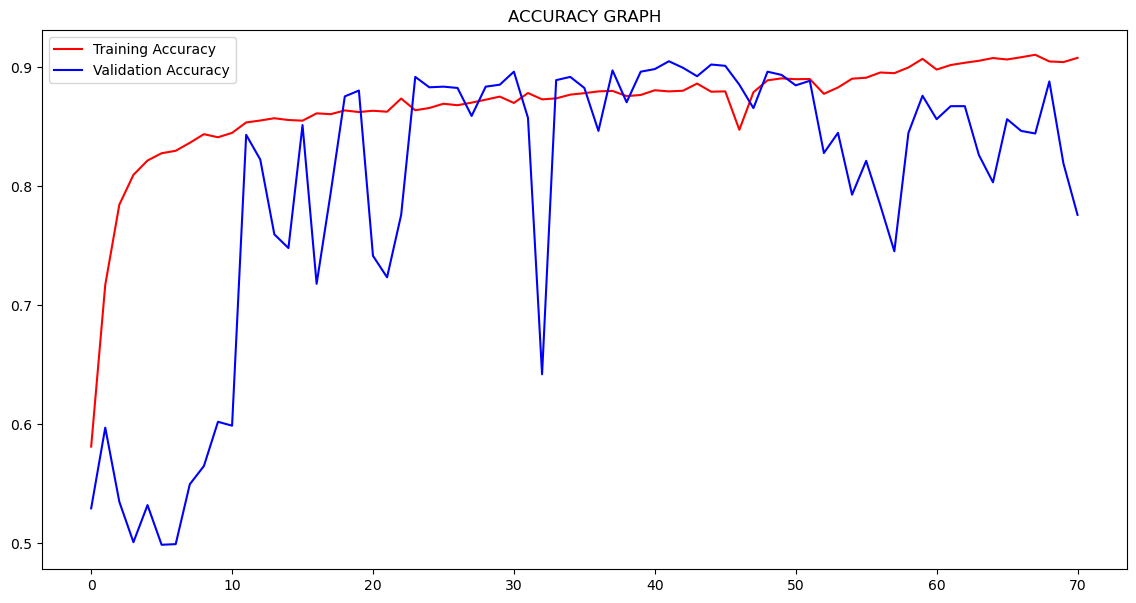

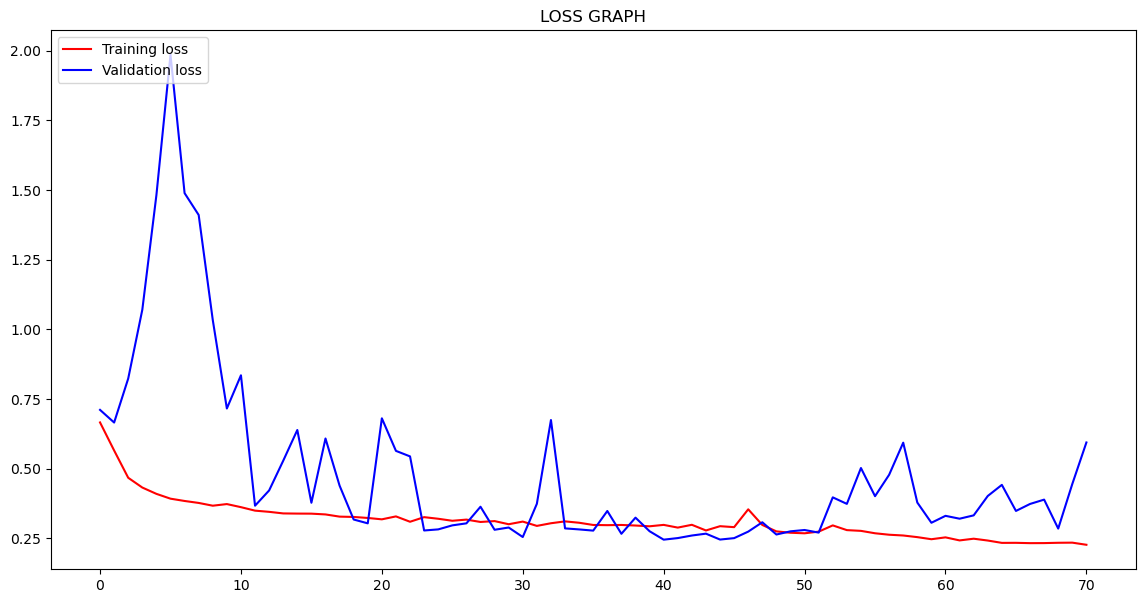

72/72 [==============================] - 2s 11ms/step


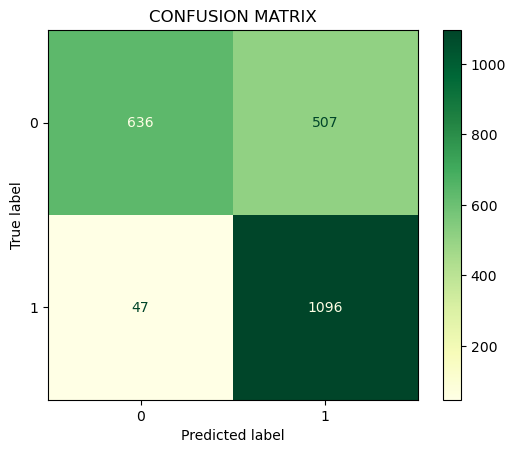

In [33]:
CNN_LSTM_model1.evaluate(X_test1,Y_test1)
eval_graph(CNN_LSTM_results_1)
conf_matrix(X_test1,Y_test1,CNN_LSTM_model1)

In [34]:
#CNN_LSTM MODEL ON SECOND DATASET

CNN_LSTM_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_2 = CNN_LSTM_model2.fit(X_train2,Y_train2,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.5385 - accuracy: 0.7255
Epoch 1: val_loss improved from inf to 0.72254, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 67s 1s/step - loss: 0.5385 - accuracy: 0.7255 - val_loss: 0.7225 - val_accuracy: 0.5036
Epoch 2/200


C:\Users\viraj\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


58/58 [==============================] - ETA: 0s - loss: 0.4307 - accuracy: 0.8082
Epoch 2: val_loss did not improve from 0.72254
58/58 [==============================] - 56s 958ms/step - loss: 0.4307 - accuracy: 0.8082 - val_loss: 0.7503 - val_accuracy: 0.5036
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 0.3870 - accuracy: 0.8287
Epoch 3: val_loss improved from 0.72254 to 0.67390, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 56s 972ms/step - loss: 0.3870 - accuracy: 0.8287 - val_loss: 0.6739 - val_accuracy: 0.5905
Epoch 4/200
58/58 [==============================] - ETA: 0s - loss: 0.3559 - accuracy: 0.8474
Epoch 4: val_loss improved from 0.67390 to 0.64271, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 56s 968ms/step - loss: 0.3559 - accuracy: 0.8474 - val_loss: 0.6427 - val_accuracy: 0.6036
Epoch 5/200
58/58 [==============================] - ETA: 0s -

58/58 [==============================] - ETA: 0s - loss: 0.1312 - accuracy: 0.9478
Epoch 29: val_loss did not improve from 0.26367
58/58 [==============================] - 57s 974ms/step - loss: 0.1312 - accuracy: 0.9478 - val_loss: 0.3090 - val_accuracy: 0.8961
Epoch 30/200
58/58 [==============================] - ETA: 0s - loss: 0.1344 - accuracy: 0.9444
Epoch 30: val_loss did not improve from 0.26367
58/58 [==============================] - 56s 973ms/step - loss: 0.1344 - accuracy: 0.9444 - val_loss: 0.2927 - val_accuracy: 0.9010
Epoch 31/200
58/58 [==============================] - ETA: 0s - loss: 0.1333 - accuracy: 0.9446
Epoch 31: val_loss did not improve from 0.26367
58/58 [==============================] - 76s 1s/step - loss: 0.1333 - accuracy: 0.9446 - val_loss: 0.2859 - val_accuracy: 0.8994
Epoch 32/200
58/58 [==============================] - ETA: 0s - loss: 0.1236 - accuracy: 0.9479
Epoch 32: val_loss did not improve from 0.26367
58/58 [==============================] - 78s

72/72 [==============================] - 9s 122ms/step - loss: 0.3192 - accuracy: 0.9116


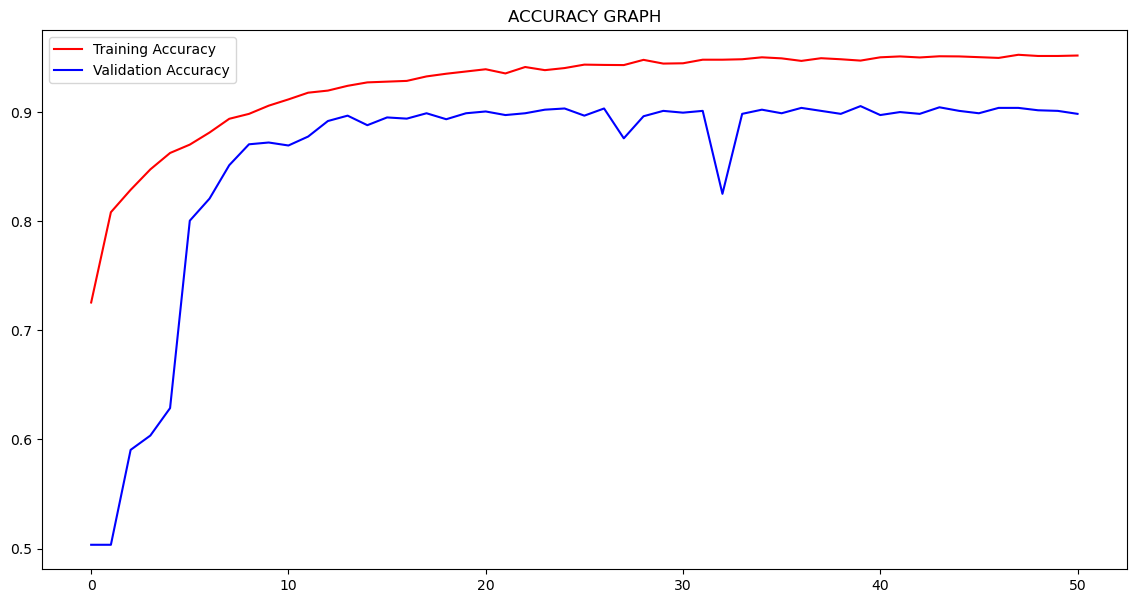

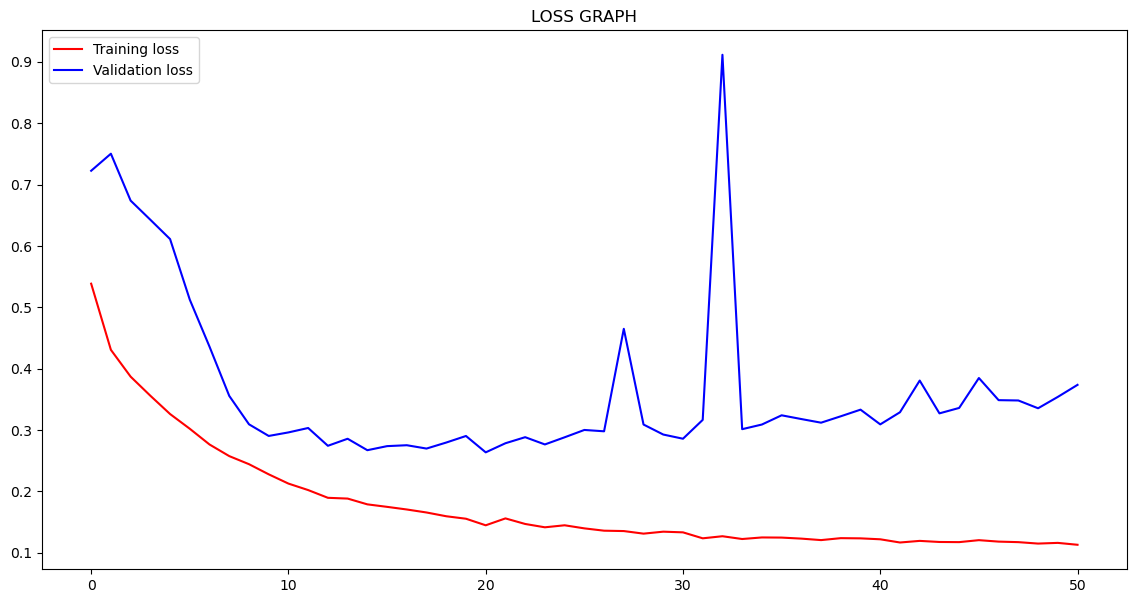

72/72 [==============================] - 11s 93ms/step


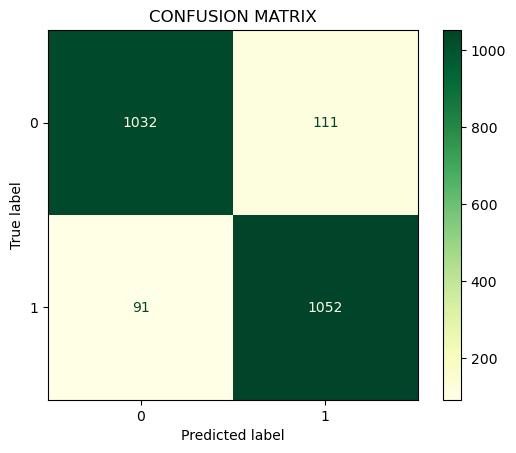

In [35]:
CNN_LSTM_model2.evaluate(X_test2,Y_test2)
eval_graph(CNN_LSTM_results_2)
conf_matrix(X_test2,Y_test2,CNN_LSTM_model2)